# Predicting Video Game Success and Sequel Potential with data

### Contribution Report


<i>1. Johnny Powell completed parts 1, 3, and 4</i>

<i>2. Madisen LeShoure completed part 2</i>

<i>3. Jeevan Rathakrishnan completed part 1 and 4</i>

## Introduction

In [27]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('video_games.csv', encoding = 'unicode_escape')
df['Sequel'] = df['Sequel'].astype(int)
df = df[df['Sequel'].isin([0, 1])]
action_games = df[df["Action"] == True]
successes = df[df["Block0.5"] == True]
success_block = action_games['Block0.5']
blockbuster = action_games[action_games['Block0.5'] == True]['US Sales (millions)']
non_blockbuster = action_games[action_games['Block0.5'] == False]['US Sales (millions)']
def make_boolean(var, true_condition):
    return (var == true_condition)

boolean_columns = ['Block0.5', 'Block1', 'Block2', 'Block4', 'Sequel']

for col in df.columns:
    if set(df[col].unique()) == {0, 1}:
        df[col] = make_boolean(df[col], 1)

print(f"{df.isnull().sum().sum()} missing values")

0 missing values


Our dataset, curated by Dr. Joe Cox from the University of Portsmouth, focuses on video games and their statistics. It includes detailed information about the sales, gameplay characteristics, and playtime of over 1,000 video games released between 2004 and 2010. Originally created to analyze what makes a video game a blockbuster, the dataset provides valuable insights into the factors driving commercial success in the gaming industry. The playtime data was collected through crowd-sourcing efforts. In total, the dataset contains 1,770 entries, each representing a game, and includes 166 columns capturing various characteristics and whether the game achieved blockbuster status based on sales.

For our first research question, we are going to use logistic regression to answer the question: How can ratings, sales, and other factors predict whether a video game will have a sequel? Our response variable for this research question is the ‘Sequel’ variable in our dataset.

For our second set of research questions, we are using linear regression to answer the questions: What is the relationship between Block0, Sequel status, Platform, and Mature Rating on US Video Game Sales after controlling for these explanatory variables, both in the sample and in the underlying population? and How does my linear regression model perform on new, unseen data when predicting US Video Game Sales in millions? Our response variable for these questions is the ‘US Sales (millions)’.

Understanding what makes a video game successful and whether it’s likely to get a sequel is crucial for developers, publishers, and marketers in the gaming industry. With billions of dollars at stake, creating a hit game or franchise can lead to huge financial rewards and lasting brand recognition. Our research questions offer valuable insights that can help developers focus on the features and designs that make a game more likely to produce a sequel, helping them decide whether to invest in building a franchise or stick with standalone games. For publishers and investors, these findings can inform smarter decisions about funding and marketing, ensuring resources go toward projects with the best chance of suess.



## Linear Regression Analytical Tasks

Goal: For your linear regression analytical task, you should pick a quantitative response
variable and at least four explanatory variables that you suspect might affect your
response variable. You will explore whether there is a linear relationship between the
explanatory variables and the response variable.


While working towards this goal, you should complete/address the following:
a. State your research questions: Your research question should have two parts.
For example, you might ask “what is the relationship between x1 and y after
controlling for x2, x3, and x4, both in the sample and in the underlying
population? How does my model perform on new data?”

What is the relationship between Block0, Sequel status, Platform, and Mature Rating on US Video Game Sales after controlling for these explanatory variables, both in the sample and in the underlying population?
How does my linear regression model perform on new, unseen data when predicting US Video Game Sales in millions?

b. First, split your data into a training and test set. Be sure that this split is
reproducible (can be replicated by another). You may pick what proportion of
observations are in the training and what proportion are in the test sets.


c. Fit a linear regression model to the training data. Include the following:
i. Show the summary output for your linear regression.
3. ii. Write out the linear regression equation for your model. Use appropriate
notation. (Note: if you use a categorical explanatory variable that has a
large number of levels, you may pick a specific level and write the model
for that specific level. Be sure to clearly state what specific fitted model
you are writing.)


d. Examine the relationship between your selected x and y in the context of this
model. Include the following:
i. Interpret your slope coefficient for your x variable of interest from your
research question, describing the relationship between your two variables
of interest (descriptive analytics).
ii. Provide a 95% confidence interval for the slope coefficient, and in doing
so perform inference for the slope in the underlying population.
iii. Create 2-3 graphical or numerical summaries that allow us to check the
linear regression conditions for your model. Do these summaries support
that the conditions are met and that your answers for the two questions
above (descriptive analytics and inference) are valid?


e. Evaluate your model performance. Include the following:
i. Discuss what percent of variability in your response variable is explained
by this model in the training data. Is this high? Is this low?
ii. Calculate the RMSE on your test data. Interpret the RMSE for the test
data. Is this high? Is this low?

## Research question:


What is the relationship between Block0.5 and US Video Game Sales (millions) after controlling for Sequel status, Platform, and Mature Rating, both in the sample and in the underlying population?
How does my linear regression model perform on new data when predicting US Video Game Sales in millions?

In [3]:
df = df.rename(columns={'US Sales (millions)': 'Sales', 'Block0.5': 'Block0'})

In [4]:
df_train, df_test = train_test_split(df, test_size = 0.2, random_state=42)

In [5]:
df_train.shape

(1410, 166)

In [6]:
df_test.shape

(353, 166)

In [7]:
pd.set_option('display.max_columns', None)
df

,ï»¿Console,Title,Sales,Block4,Block2,Block1,Block0,YearReleased,2004,2005,2006,2007,2008,2009,2010,YearReleasedSq,Publisher,Genre,Sequel,Re-release,Usedprice,lnUsedPrice,Review Score,ReviewSq,RatingE,RatingT,RatingM,Lifecycle,LifecycleSq,MaxPlayers,MaxPlayersSq,Online,Licensed,Handheld,Accessory,LtdEdition,Multiplatform,GBA,GCN,NDS,Wii,PS2,PS3,PSP,Xbox,X360,Action,Adventure,Educational,Racing,RPG,Simulation,Sports,Strategy,2K,Acclaim,Activision,Atari,Capcom,Disney,Eidos,EA,Infograme,Konami,Microsoft,Midway,Namco,Nintendo,Rockstar,Sony,Sega,THQ,SquareEnix,Ubisoft,Adult,Anime,Arcade,Battlemech,Boardgame,Cards,Casino,Chess,Comics,Cyberpunk,Detective,Fighting,Flight,Gameshow,Helicoptor,HistoricalBattle,Horror,InteractiveFiction,InteractiveFictionGraphics,InteractiveMovie,Managerial,MartialArts,MedievalFantasy,Meditative,MentalTraining,Naval,Paddle,PersistentUniverse,Pinball,PostApocalyptic,Puzzle,RealTime,RhythmAction,SciFi,Shooter,Spy,Stealth,SurvivalHorror,Tank,Train,TurnBased,VideoBackdrop,VisualNovel,Ecology,Language,Geography,Graphics,Health,History,Maths,Music,PreSchool,Reading,Religion,Science,Sociology,Typing,AmericanFootball,Basketball,Baseball,Boxing,Bowling,Cricket,Fishing,Cycling,Golf,Hockey,Horse,Hunting,Motorcycle,OffRoad,Olympiad,Paintball,PingPong,Pool,Rugby,Sailing,Skateboarding,Snowboarding,Soccer,Surfing,Tennis,Tricks,Volleyball,Wakeboarding,Wrestling,FirstPerson,Platform,Isometric,SideScrolling,TopDown,ThirdPerson
0,Nintendo DS,Super Mario 64 DS,4.69,True,True,True,True,2004,True,False,False,False,False,False,False,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., L...",Action,True,True,24.95,3.216874,85,7225,True,False,False,0,0,1,1,False,False,True,False,False,False,0,0,True,False,0,False,False,0,False,True,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,0,0,False,0,0,0,False,False,False,False,False,False,0,False,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,Sony PSP,Lumines: Puzzle Fusion,0.56,False,False,False,True,2004,True,False,False,False,False,False,False,4016016,"Bandai Co., Ltd., Ubisoft Entertainment SA, Ub...",Strategy,False,False,14.95,2.704711,89,7921,False,False,False,0,0,1,1,True,False,True,False,False,False,0,0,False,False,0,False,True,0,False,False,False,False,False,False,False,False,True,False,0,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,0,0,False,0,0,0,False,False,False,False,False,False,0,False,0,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Nintendo DS,WarioWare Touched!,0.54,False,False,False,True,2004,True,False,False,False,False,False,False,4016016,"Nintendo Australia Pty., Ltd., Nintendo Co., L...","Action, Racing / Driving, Sports",True,False,22.95,3.133318,81,6561,True,False,False,0,0,2,4,False,False,True,False,False,False,0,0,True,False,0,False,False,0,False,True,False,False,True,False,False,True,False,False,0,False,False,False,False,False,False,0,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0,False,False,False,

In [8]:
df.columns

Index(['ï»¿Console', 'Title', 'Sales', 'Block4', 'Block2', 'Block1', 'Block0',
       'YearReleased', '2004', '2005',
       ...
       'Tricks', 'Volleyball', 'Wakeboarding', 'Wrestling', 'FirstPerson',
       'Platform', 'Isometric', 'SideScrolling', 'TopDown', 'ThirdPerson'],
      dtype='object', length=166)

# Linear Regression Model 
### Summary Output

In [9]:
results = smf.ols('Sales ~ Block0 + Sequel + Platform + RatingM', data = df_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     157.5
Date:                Tue, 03 Dec 2024   Prob (F-statistic):          2.18e-111
Time:                        23:26:28   Log-Likelihood:                -1801.6
No. Observations:                1410   AIC:                             3613.
Df Residuals:                    1405   BIC:                             3640.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0880      0.037      2.405      0.016       0.016       0.160
Block0[T.True]       1.3577      0.057     23.641      0.000       1.245       1.470
Sequel[T.True]       0.1121      0.047      2.379      0.017       0.020       0.205
Platform[T.True]     0.1584      0.085      1.857      0.063      -0.009       0.326
RatingM[T.True]      0.1569      0.067      2.354      0.019       0.026       0.288
==============================================================================
Omnibus:                     1955.870   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           416690.470
Skew:                           7.842   Prob(JB):                         0.00
Kurtosis:                      85.744   Cond. No.                         4.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linear Regression Model Equation

Y(Hat) = 0.0828 + 1.3833(Block0.5) + 0.1147(Sequel) + 0.1562(Platform) + 0.1603(RatingM)

To examine the relationship between our selected variable of interest (Block0.5) and the response variable (US Sales (millions)) in the context of our fitted model.

Slope Coefficient Interpretation for Block0.5:

Block0.5 Coefficient: 1.354
For games with Block0.5 = 1, US Sales (millions) are predicted to be $1.354 million higher compared to games with Block0.5 = 0, holding other variables constant.

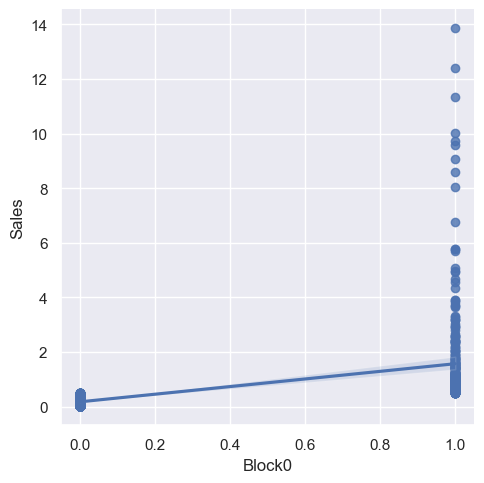

In [10]:
sns.lmplot(data= df_train, x='Block0', y='Sales')

In [11]:
df_quant = df_train[['Block0', 'Sequel', 'Platform', 'RatingM']]
df_quant.corr()

,Block0,Sequel,Platform,RatingM
Block0,1.000000,0.168263,0.038543,0.093662
Sequel,0.168263,1.000000,-0.046836,0.004194
Platform,0.038543,-0.046836,1.000000,-0.100067
RatingM,0.093662,0.004194,-0.100067,1.000000


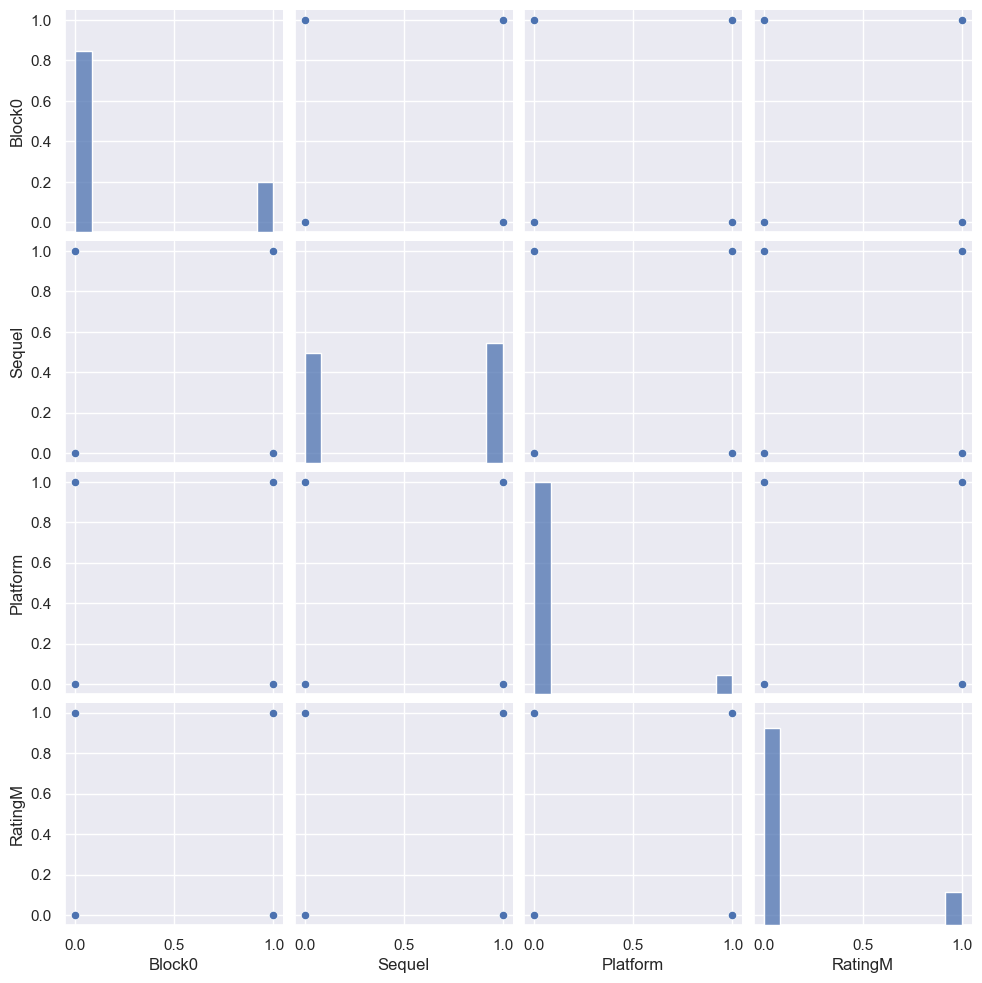

In [12]:
sns.pairplot(df_quant)

## Fitted vs Residual Plot

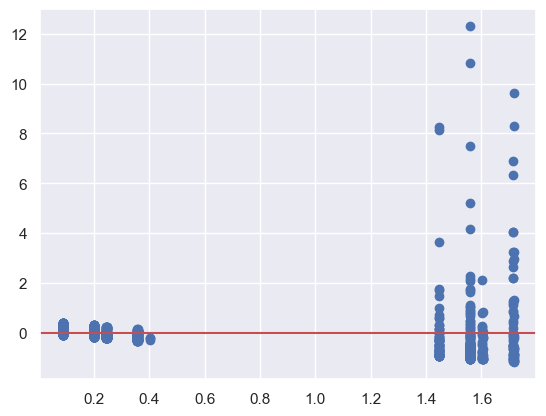

In [13]:
df_train_fitted_value = results.predict(df_train)
df_train_resid = df_train['Sales'] - df_train_fitted_value
plt.scatter(x= df_train_fitted_value, y = df_train_resid)
plt.axhline(color = 'r')

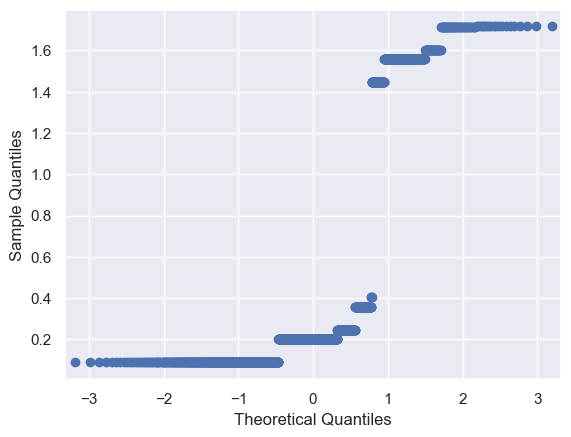

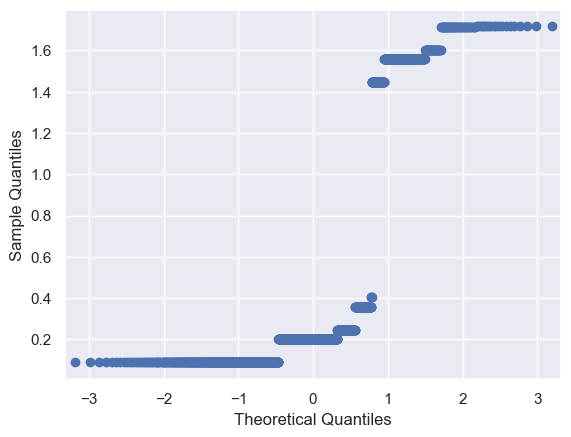

In [14]:
import statsmodels.api as sm
sm.qqplot(df_train_fitted_value)

Based on the graphical summaries from our fitted model, we can conclude that 

The response variable is quantitative. There is a linear relationship between each of the x variables and the y variables

Based on the graphical summaries, the assumption of quantitative variables is met & the assumption of normality for the residuals is not fully met. The points deviate from the diagonal line, especially at the tails, indicating some non-normality in the residual distribution. The plot suggests that the linear regression model may not be appropriate for this data, as the assumption of linearity. 

When these assumptions are violated the confidence interval may not provide accurate 95% coverage, making the inferences about the population slope less reliable, leading to an incorrect estimation of the true uncertainty around the slope coefficient. The slope coefficients may be biased and may not accurately represent the true relationship between the predictor and the response variable.

In [15]:
results.rsquared

np.float64(0.3095303723674061)

Percent of Variability Explained in Training Data:
R-squared= 0.317
This means the model explains 31.7% of the variability in the response variable (US Sales (millions)) in the training data. This R-squared value is considered a low-to-moderate level of explanation. So the 31.7% variability explained by this model is on the lower side, indicating there are other factors not captured by the model that could be important in predicting US Sales.

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred_test = results.predict(df_test)

# Evaluate the model
test_mse = mean_squared_error(df_test['Sales'], y_pred_test)
test_r2 = r2_score(df_test['Sales'], y_pred_test)

In [17]:
eval = {
    'Test MSE': test_mse, 'Test R-squared': test_r2 }
eval

{'Test MSE': np.float64(0.9460318348569113),
 'Test R-squared': 0.2826949377443604}

## Logistic Regression Analytical Tasks

How do 'Review Score', 'YearReleased', and 'US Sales (millions)' relate to the log-odds of a game being a sequel?


In [18]:
data = df[['Review Score', 'YearReleased', 'Sales', 'Sequel']]

In [19]:
x_train, x_test, y_train, y_test = train_test_split(data[['Review Score', 'YearReleased', 'Sales']], data['Sequel'], 
                                                    test_size = 0.2, random_state = 42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [20]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [21]:
print("Unique values in y_train:", y_train.unique())

Unique values in y_train: [False  True]


In [22]:
model = sm.Logit(y_train, sm.add_constant(x_train_scaled)).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.652739
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Sequel   No. Observations:                 1410
Model:                          Logit   Df Residuals:                     1406
Method:                           MLE   Df Model:                            3
Date:                Tue, 03 Dec 2024   Pseudo R-squ.:                 0.05698
Time:                        23:26:32   Log-Likelihood:                -920.36
converged:                       True   LL-Null:                       -975.97
Covariance Type:            nonrobust   LLR p-value:                 5.980e-24
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0974      0.056      1.743      0.081      -0.012       0.207
x1             0.5200      0.

## Interpretation of Coefficients

<b>Review Score (x1):</b> Higher review scores are associated with a higher probability of a game being a sequel.

<b>Year Released (x2):</b> The year of release does not significantly affect the probability of a game being a sequel.

<b>US Sales (millions) (x3):</b> Higher US sales are associated with a higher probability of a game being a sequel.

<b>const:</b> The intercept of the model. It represents the log-odds of the response variable being 1 when all explanatory variables are zero.


In [23]:
y_pred_prob = log_reg.predict_proba(x_test_scaled)[:, 1]
print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("Pseudo R-Squared:", 1 - (model.llf / model.llnull))

AUC: 0.638040262413172
Pseudo R-Squared: 0.05698148527686697


C:\Users\johna\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [24]:
y_pred_class = (y_pred_prob >= 0.5).astype(int)
pd.crosstab(y_test, y_pred_class, rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
False,128,41
True,113,71


In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)
accuracy = (tn+tp)/(tn+tp+fn+fp)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)
print('Accuracy:', accuracy)

Sensitivity: 0.3858695652173913
Specificity: 0.757396449704142
Accuracy: 0.5637393767705382


False negatives are the more important error to minimize for the following reasons:

Market Strategy: Missing out on identifying a sequel could lead to incorrect market strategies and missed opportunities for targeted marketing and promotions.
Sales Forecasting: Accurate identification of sequels can improve sales forecasting and inventory management, ensuring that popular titles are adequately stocked


In [26]:
if sensitivity > specificity:
    print("The classifier performs well in minimizing false negatives.")
else:
    print("The classifier needs improvement in minimizing false negatives.")

The classifier needs improvement in minimizing false negatives.


## Conclusion

a. Summarization
In this project, we conducted both linear and logistic regression analyses to understand the factors influencing video game sales and the likelihood of a game being a sequel.

Linear Regression Analysis: We explored the relationship between Block0.5, Sequel status, Platform, and Mature Rating on US Video Game Sales (millions). The linear regression model revealed that:

Games with Block0.5 status are predicted to have $1.354 million higher sales compared to games without Block0.5 status, holding other variables constant.
Sequel status, platform, and mature rating also showed significant relationships with sales, though the effect sizes varied.
The model explained 31.7% of the variability in US Video Game Sales in the training data, indicating a low-to-moderate level of explanation. The RMSE on the test data was 0.946, suggesting that the model's predictions have some error.
Logistic Regression Analysis: We analyzed the factors influencing whether a game is a sequel, focusing on Review Score, Year Released, and US Sales (millions). The logistic regression model showed that:

Higher review scores and higher US sales are associated with a higher probability of a game being a sequel.
The year of release did not significantly impact the likelihood of a game being a sequel.
The model's performance metrics, including AUC, accuracy, sensitivity, and specificity, indicated that the classifier needs improvement in minimizing false negatives.
b. Limitations
Several limitations were encountered during the analysis:

Data Quality: The dataset had missing values, which were handled by dropping rows with missing data. This approach might have led to the loss of potentially valuable information.
Model Assumptions: Both the linear and logistic regression models assume linear relationships between the explanatory variables and the response variable. Non-linear relationships might not be adequately captured by these models.
Generalizability: The dataset is limited to video games released between 2004 and 2010. The findings might not generalize to games released outside this period or to other entertainment industries.
c. Future Work
Future research could address the following areas:

Data Imputation: Implementing advanced techniques for handling missing data, such as multiple imputation, could improve the robustness of the analysis.
Model Enhancement: Exploring non-linear models or ensemble methods, such as random forests or gradient boosting, could potentially capture more complex relationships between the variables.
Broader Dataset: Expanding the dataset to include more recent video games and additional variables, such as marketing spend or social media presence, could provide a more comprehensive understanding of the factors influencing game sequels and sales.
Error Minimization: Developing strategies to specifically minimize false negatives, such as adjusting the decision threshold or using cost-sensitive learning, could enhance the classifier's performance.
